# **Heart Failure**

1. **Mô tả**:

- Dataset Heart Failure bao gồm các dữ liệu y tế về bệnh nhân suy tim, với mục đích dự đoán khả năng bệnh nhân bị suy tim dựa trên nhiều thuộc tính khác nhau. Đây là một bài toán phân loại nhị phân với nhiều đặc điểm số và đặc điểm phân loại.

2. **Ứng dụng**:

- Phân tích dữ liệu y tế: Giúp phân tích các yếu tố nguy cơ dẫn đến suy tim.
- Phát triển mô hình học máy: Dữ liệu có thể được sử dụng để phát triển các mô hình học máy nhằm dự đoán khả năng suy tim của bệnh nhân.
- Hỗ trợ ra quyết định: Giúp bác sĩ và các chuyên gia y tế đưa ra các quyết định điều trị và quản lý sớm đối với các bệnh nhân có nguy cơ cao.

3. **Vấn đề cần giải quyết**

- Phân tích dữ liệu để tìm hiểu các xu hướng, đặc điểm của các bệnh nhân có nguy cơ suy tim và xây dựng mô hình dự đoán khả năng suy tim.

> Thông Tin Các Cột Dữ Liệu (dataset: `heart_failure.csv`)

| Tên Cột                  | Mô Tả                                                           |
|--------------------------|-----------------------------------------------------------------|
| age                      | Tuổi của bệnh nhân                                             |
| anaemia                  | Giảm số lượng hồng cầu hoặc hemoglobin (boolean)               |
| creatinine_phosphokinase | Mức độ enzyme CPK trong máu (mcg/L)                            |
| diabetes                 | Bệnh nhân có bị tiểu đường hay không (boolean)                 |
| ejection_fraction        | Tỷ lệ phần trăm máu mà tâm thất trái bơm ra mỗi lần co bóp     |
| high_blood_pressure      | Tăng huyết áp (boolean)                                        |
| platelets                | Tiểu cầu trong máu (k/μL)                                      |
| serum_creatinine         | Creatinine huyết thanh (mg/dL)                                 |
| serum_sodium             | Nồng độ natri trong máu (mEq/L)                                |
| sex                      | Giới tính (1: Nam, 0: Nữ)                                      |
| smoking                  | Bệnh nhân có hút thuốc hay không (boolean)                     |
| time                     | Thời gian theo dõi (ngày)                                      |
| DEATH_EVENT              | Bệnh nhân có tử vong do suy tim hay không (1: Có, 0: Không)    |


## **THỰC HÀNH VÀ ỨNG DỤNG**

- Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

### **A. Áp Dụng Kiến Thức Pandas**

- Thực hành Đọc dữ liệu với file ``.csv``

In [2]:
# Đọc dữ liệu từ file CSV
heart_failure = pd.read_csv('./dataset/heart_failure.csv')
heart_failure.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


##### Giải thích:

- ``pd.read_csv('/mnt/data/heart_failure.csv')``: Sử dụng hàm read_csv của thư viện pandas để đọc dữ liệu từ file CSV và lưu vào biến heart_failure.
- ``heart_failure.head(10)``: Hiển thị 10 dòng đầu tiên của DataFrame heart_failure để xem qua cấu trúc và một phần dữ liệu của file CSV đã được đọc. 

In [3]:
# Kiểm tra kích thước của DataFrame
heart_failure.shape

(299, 13)

##### Giải thích:

- ``heart_failure.shape``: Trả về một tuple thể hiện kích thước của DataFrame heart_failure, với số hàng và số cột tương ứng.

In [4]:
# Kiểm tra tên các cột
heart_failure.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

##### Giải thích:

- ``heart_failure.columns``: Trả về danh sách các tên cột của DataFrame heart_failure.

In [5]:
# Kiểm tra thông tin tóm tắt về DataFrame
heart_failure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


##### Giải thích:

- ``heart_failure.info()``: Hiển thị thông tin tóm tắt về DataFrame heart_failure, bao gồm:
    - Tổng số lượng hàng (entries).
    - Tên các cột.
    - Số lượng giá trị không rỗng (non-null) trong mỗi cột.
    - Kiểu dữ liệu của mỗi cột (e.g., int64, float64, object).
    - Dung lượng bộ nhớ mà DataFrame chiếm dụng.

In [6]:
# Mô tả chi tiết các cột dữ liệu
heart_failure.describe(include='all')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


##### Giải thích:

- ``describe(include='all')``: Cung cấp mô tả chi tiết cho tất cả các cột trong DataFrame, bao gồm cả các cột có kiểu dữ liệu object.

### **B. Áp Dụng Kiến Thức Numpy**

#### 1. Basic Numpy Operations

In [7]:
# Chuyển đổi cột 'serum_creatinine' thành mảng numpy và tính các thống kê cơ bản
serum_creatinine = heart_failure['serum_creatinine'].to_numpy()
mean_serum_creatinine = np.nanmean(serum_creatinine)
median_serum_creatinine = np.nanmedian(serum_creatinine)
std_serum_creatinine = np.nanstd(serum_creatinine)
print("Mean Serum Creatinine:", mean_serum_creatinine)
print("Median Serum Creatinine:", median_serum_creatinine)
print("Standard Deviation of Serum Creatinine:", std_serum_creatinine)

Mean Serum Creatinine: 1.3938795986622072
Median Serum Creatinine: 1.1
Standard Deviation of Serum Creatinine: 1.0327786652795918


##### Giải thích:

- ``to_numpy()``: Chuyển đổi cột 'serum_creatinine' thành mảng numpy.
- ``np.nanmean()``: Tính giá trị trung bình của mảng, bỏ qua các giá trị NaN.
- ``np.nanmedian()``: Tính giá trị trung vị của mảng, bỏ qua các giá trị NaN.
- ``np.nanstd()``: Tính độ lệch chuẩn của mảng, bỏ qua các giá trị NaN.

#### 2. Handling Missing Values

In [8]:
# Kiểm tra các giá trị thiếu trong dataset
missing_values = heart_failure.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Điền các giá trị thiếu bằng giá trị trung vị của cột tương ứng
heart_failure['serum_creatinine'] = heart_failure['serum_creatinine'].fillna(heart_failure['serum_creatinine'].median())
heart_failure['serum_sodium'] = heart_failure['serum_sodium'].fillna(heart_failure['serum_sodium'].median())
heart_failure['platelets'] = heart_failure['platelets'].fillna(heart_failure['platelets'].median())
heart_failure['creatinine_phosphokinase'] = heart_failure['creatinine_phosphokinase'].fillna(heart_failure['creatinine_phosphokinase'].median())
heart_failure['ejection_fraction'] = heart_failure['ejection_fraction'].fillna(heart_failure['ejection_fraction'].median())

# Xác minh các giá trị bị thiếu đã được xử lý
print("Missing values after filling:\n", heart_failure.isnull().sum())

Missing values in each column:
 age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64
Missing values after filling:
 age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


##### Giải thích:

- ``heart_failure.isnull().sum()``: Kiểm tra và đếm số lượng giá trị bị thiếu trong mỗi cột của DataFrame heart_failure.
- ``fillna(median)``: Điền các giá trị thiếu trong mỗi cột bằng giá trị trung vị của cột tương ứng và cập nhật trực tiếp vào DataFrame heart_failure.

#### 3. Data Transformation

In [9]:
# Biến đổi log của 'serum_creatinine'
log_serum_creatinine = np.log(heart_failure['serum_creatinine'])
# Hiển thị dữ liệu đã biến đổi
print("Original Serum Creatinine:", heart_failure['serum_creatinine'][:5])
print("Log Transformed Serum Creatinine:", log_serum_creatinine[:5])

Original Serum Creatinine: 0    1.9
1    1.1
2    1.3
3    1.9
4    2.7
Name: serum_creatinine, dtype: float64
Log Transformed Serum Creatinine: 0    0.641854
1    0.095310
2    0.262364
3    0.641854
4    0.993252
Name: serum_creatinine, dtype: float64


##### Giải thích:

- ``np.log()``: Áp dụng phép biến đổi log tự nhiên cho các giá trị trong mảng.

#### 4. Data Aggregation

In [10]:
# Tổng hợp 'serum_creatinine' theo 'DEATH_EVENT'
death_event_creatinine = heart_failure.groupby('DEATH_EVENT')['serum_creatinine'].sum().to_numpy()
# Hiển thị dữ liệu tổng hợp
print("Serum Creatinine by DEATH_EVENT:", death_event_creatinine)

Serum Creatinine by DEATH_EVENT: [240.53 176.24]


##### Giải thích:

- ``groupby()``: Nhóm dữ liệu theo 'DEATH_EVENT'.
- ``sum()``: Tính tổng creatinine huyết thanh cho từng nhóm DEATH_EVENT.
- ``to_numpy()``: Chuyển đổi kết quả thành mảng numpy.

#### 5. Data Normalization

In [11]:
# Chuẩn hóa Min-Max của 'serum_creatinine'
min_serum_creatinine = np.min(heart_failure['serum_creatinine'])
max_serum_creatinine = np.max(heart_failure['serum_creatinine'])
normalized_serum_creatinine = (heart_failure['serum_creatinine'] - min_serum_creatinine) / (max_serum_creatinine - min_serum_creatinine)
print("Normalized Serum Creatinine:", normalized_serum_creatinine[:5])

Normalized Serum Creatinine: 0    0.157303
1    0.067416
2    0.089888
3    0.157303
4    0.247191
Name: serum_creatinine, dtype: float64


##### Giải thích:

- ``np.min()``: Tìm giá trị nhỏ nhất trong mảng.
- ``np.max()``: Tìm giá trị lớn nhất

### **C. Thực Hiện Làm Sạch Dữ Liệu - Data Cleaning**

In [12]:
# Kiểm tra các giá trị bị thiếu
missing_values = heart_failure.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Điền các giá trị thiếu bằng giá trị trung vị của cột tương ứng
heart_failure['serum_creatinine'] = heart_failure['serum_creatinine'].fillna(heart_failure['serum_creatinine'].median())
heart_failure['serum_sodium'] = heart_failure['serum_sodium'].fillna(heart_failure['serum_sodium'].median())
heart_failure['platelets'] = heart_failure['platelets'].fillna(heart_failure['platelets'].median())
heart_failure['creatinine_phosphokinase'] = heart_failure['creatinine_phosphokinase'].fillna(heart_failure['creatinine_phosphokinase'].median())
heart_failure['ejection_fraction'] = heart_failure['ejection_fraction'].fillna(heart_failure['ejection_fraction'].median())

# Xác minh các giá trị bị thiếu đã được xử lý
print("Missing values after filling:\n", heart_failure.isnull().sum())

Missing values in each column:
 age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64
Missing values after filling:
 age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


##### Giải thích:

- ``heart_failure.isnull().sum()``: Kiểm tra và đếm số lượng giá trị bị thiếu trong mỗi cột của DataFrame heart_failure.
- ``fillna(median)``: Điền các giá trị thiếu trong mỗi cột bằng giá trị trung vị của cột tương ứng và cập nhật trực tiếp vào DataFrame heart_failure.

### **D. Áp Dụng Kiến Thức Matplotlib - Data Visualization**

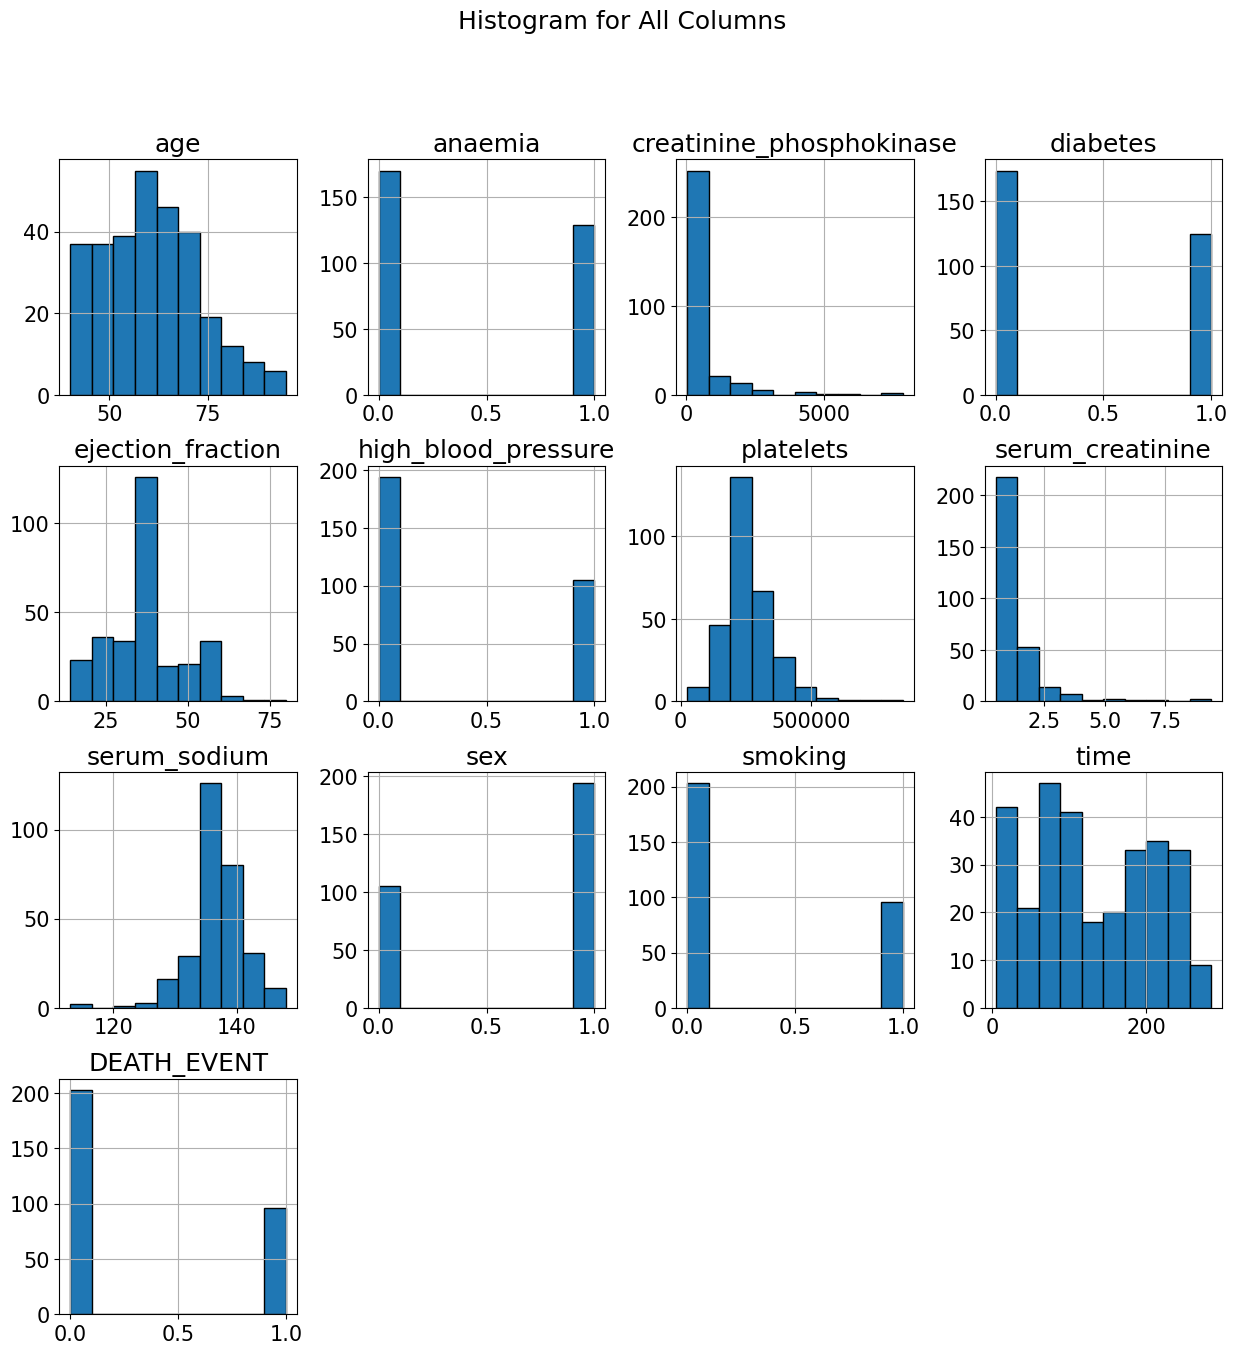

In [13]:
# Thiết lập môi trường vẽ biểu đồ
%matplotlib inline
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (10, 10)
matplotlib.rcParams['font.size'] = 15

# Vẽ biểu đồ histogram cho toàn bộ các cột trong dataset
heart_failure.hist(figsize=(15, 15), edgecolor='black')
plt.suptitle('Histogram for All Columns')
plt.show()

#### 1. Biểu Đồ Phân Phối Creatinine Huyết Thanh (Serum Creatinine Distribution)

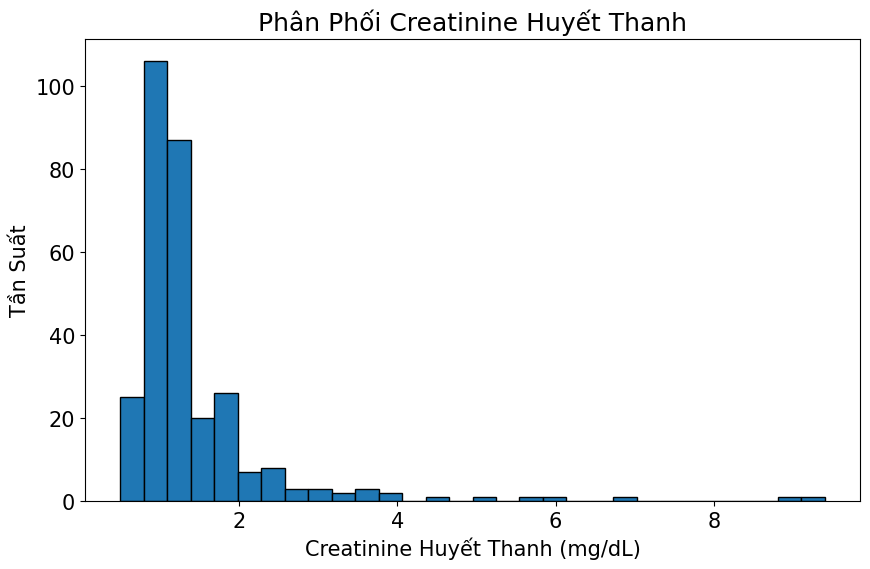

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(heart_failure['serum_creatinine'], bins=30, edgecolor='black')
plt.title('Phân Phối Creatinine Huyết Thanh')
plt.xlabel('Creatinine Huyết Thanh (mg/dL)')
plt.ylabel('Tần Suất')
plt.show()

#### 2. Biểu Đồ Box Plot Cho Ejection Fraction Theo DEATH_EVENT

<Figure size 1200x800 with 0 Axes>

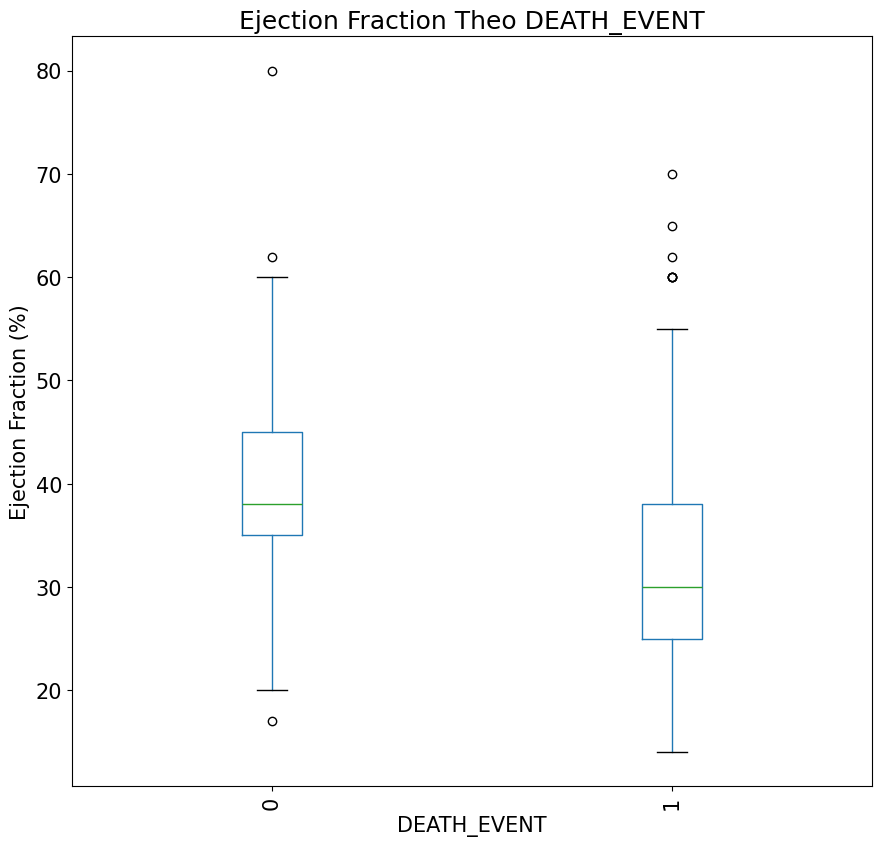

In [15]:
plt.figure(figsize=(12, 8))
heart_failure.boxplot(column='ejection_fraction', by='DEATH_EVENT', grid=False)
plt.title('Ejection Fraction Theo DEATH_EVENT')
plt.suptitle('')
plt.xlabel('DEATH_EVENT')
plt.ylabel('Ejection Fraction (%)')
plt.xticks(rotation=90)
plt.show()

#### 3. Biểu Đồ Scatter Plot Giữa Serum Sodium và Creatinine Huyết Thanh (Serum Sodium vs. Serum Creatinine)

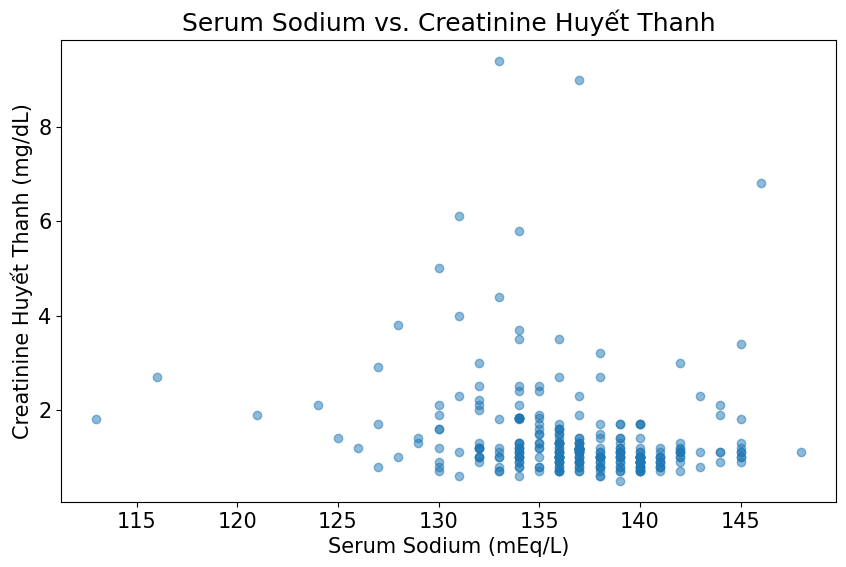

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(heart_failure['serum_sodium'], heart_failure['serum_creatinine'], alpha=0.5)
plt.title('Serum Sodium vs. Creatinine Huyết Thanh')
plt.xlabel('Serum Sodium (mEq/L)')
plt.ylabel('Creatinine Huyết Thanh (mg/dL)')
plt.show()

#### 4. Biểu Đồ Thanh Cho Số Lần Hút Thuốc Theo DEATH_EVENT (Smoking by DEATH_EVENT)

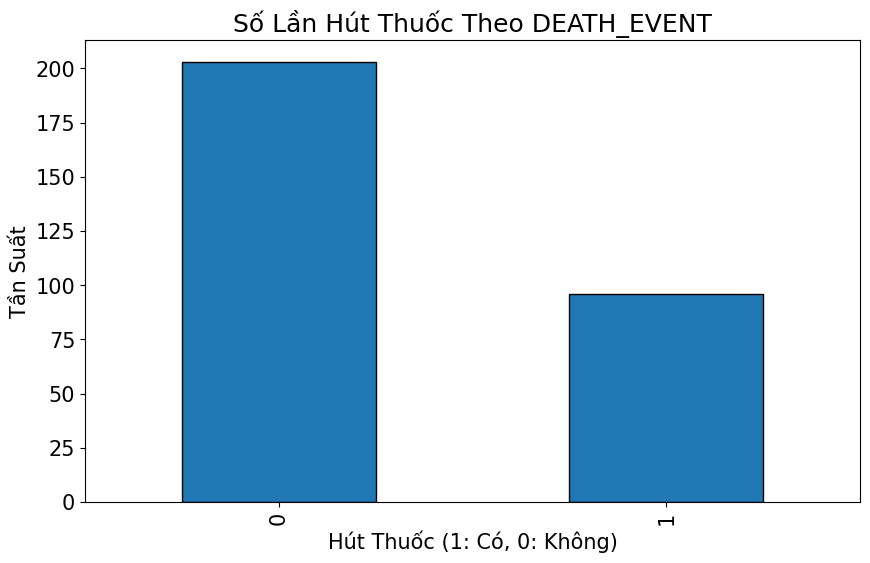

In [17]:
plt.figure(figsize=(10, 6))
heart_failure['smoking'].value_counts().sort_index().plot(kind='bar', edgecolor='black')
plt.title('Số Lần Hút Thuốc Theo DEATH_EVENT')
plt.xlabel('Hút Thuốc (1: Có, 0: Không)')
plt.ylabel('Tần Suất')
plt.show()

#### 5. Biểu Đồ Tròn (Pie Chart) Cho Giới Tính (Sex)

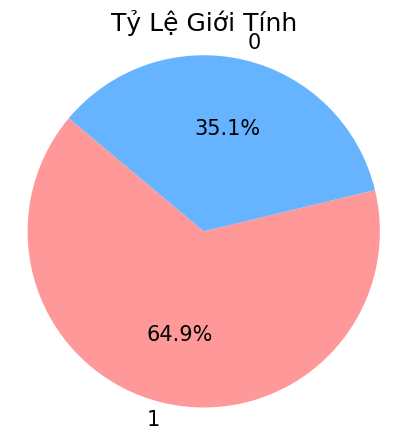

In [18]:
plt.figure(figsize=(5, 5))
sex_counts = heart_failure['sex'].value_counts()
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Tỷ Lệ Giới Tính')
plt.axis('equal') # Đảm bảo biểu đồ tròn được vẽ dưới dạng hình tròn
plt.show()

##### Giải thích:

- Phân Phối Creatinine Huyết Thanh (Serum Creatinine Distribution): Vẽ biểu đồ histogram để hiểu rõ hơn về phân phối creatinine huyết thanh của các bệnh nhân.
- Box Plot Cho Ejection Fraction Theo DEATH_EVENT: Vẽ biểu đồ box plot để so sánh ejection fraction theo từng nhóm DEATH_EVENT.
- Scatter Plot Giữa Serum Sodium và Creatinine Huyết Thanh (Serum Sodium vs. Serum Creatinine): Vẽ biểu đồ scatter plot để thể hiện mối quan hệ giữa nồng độ natri và creatinine huyết thanh.
- Thanh Cho Số Lần Hút Thuốc Theo DEATH_EVENT (Smoking by DEATH_EVENT): Vẽ biểu đồ thanh để đếm số lần hút thuốc theo DEATH_EVENT.
- Pie Chart Cho Giới Tính (Sex): Vẽ biểu đồ tròn để hiển thị tỷ lệ giới tính của các bệnh nhân.

## PHÂN TÍCH DỮ LIỆU

> Dữ liệu từ bộ dataset 'Heart Failure' bao gồm các ghi chép y tế của các bệnh nhân suy tim, với các thông tin về tuổi, giới tính, các chỉ số sinh hóa, tình trạng bệnh lý và các yếu tố nguy cơ khác. Việc phân tích dữ liệu từ dataset này sẽ giúp chúng ta có cái nhìn tổng quan về các yếu tố nguy cơ dẫn đến suy tim và hỗ trợ trong việc xây dựng mô hình dự đoán.

### Các bước phân tích dữ liệu:

1. **Khám phá dữ liệu (Data Exploration):**

- Kiểm tra các giá trị bị thiếu và xử lý chúng.
- Tính toán các thống kê mô tả cơ bản như trung bình, trung vị, và độ lệch chuẩn cho các biến số.
- Vẽ các biểu đồ phân phối để hiểu rõ hơn về dữ liệu.

2. **Phân tích mối quan hệ (Relationship Analysis):**

- Sử dụng biểu đồ scatter plot để phân tích mối quan hệ giữa nồng độ natri và creatinine huyết thanh.
- Sử dụng biểu đồ box plot để so sánh ejection fraction theo từng nhóm DEATH_EVENT.
- Sử dụng biểu đồ bar plot để phân tích số lần hút thuốc theo DEATH_EVENT và các yếu tố khác.

3. **Chuẩn hóa và biến đổi dữ liệu (Data Transformation and Normalization):**

- Chuẩn hóa các biến số như creatinine huyết thanh để đảm bảo dữ liệu nằm trong khoảng hợp lý.
- Biến đổi các biến số như creatinine huyết thanh để giảm thiểu sự ảnh hưởng của các giá trị ngoại lệ.

4. **Tạo các biến số mới (Feature Engineering):**

- Tạo các biến số mới từ dữ liệu hiện có, ví dụ như tạo biến số tổng hợp từ nồng độ natri và creatinine huyết thanh để tạo ra chỉ số mới thể hiện mức độ nguy cơ suy tim.

### Lợi ích của việc phân tích dữ liệu với Numpy, Pandas và Matplotlib:

1. **Numpy:**

- Giúp thực hiện các phép toán nhanh chóng và hiệu quả trên các mảng dữ liệu lớn.
- Hỗ trợ tính toán các thống kê mô tả cơ bản và nâng cao.

2. **Pandas:**

- Cung cấp các công cụ mạnh mẽ để thao tác và xử lý dữ liệu, từ việc đọc, ghi dữ liệu đến việc xử lý các giá trị bị thiếu, lọc dữ liệu, và nhóm dữ liệu.
- Giúp dễ dàng khám phá và phân tích dữ liệu với các phương thức tiện lợi.

3. **Matplotlib:**

- Giúp trực quan hóa dữ liệu một cách sinh động và dễ hiểu thông qua các biểu đồ đa dạng.
- Hỗ trợ tạo các biểu đồ tùy chỉnh để phù hợp với các nhu cầu phân tích khác nhau.

### Tầm quan trọng của phân tích dữ liệu:

Phân tích dữ liệu là một bước quan trọng trong quá trình ra quyết định dựa trên dữ liệu. Đối với một Data Analyst, việc phân tích dữ liệu mang lại những lợi ích sau:

1. **Hiểu rõ hơn về dữ liệu:**

- Giúp khám phá và hiểu rõ các đặc điểm của dữ liệu, từ đó phát hiện ra các vấn đề và cơ hội tiềm năng.

2. **Xác định các yếu tố ảnh hưởng:**

- Giúp xác định các yếu tố chính ảnh hưởng đến khả năng suy tim, từ đó đưa ra các quyết định điều trị và quản lý hợp lý.

3. **Dự đoán và tối ưu hóa:**

- Giúp chuẩn bị dữ liệu cho các mô hình dự đoán, từ đó dự đoán chính xác khả năng suy tim và tối ưu hóa các chiến lược điều trị.

4. **Ra quyết định dựa trên dữ liệu:**

- Cung cấp cơ sở khoa học cho việc ra quyết định, giảm thiểu rủi ro và tăng cường hiệu quả điều trị.

5. Nâng cao kỹ năng và hiệu suất làm việc: 

- Giúp Data Analyst nâng cao kỹ năng phân tích và trực quan hóa dữ liệu, từ đó cải thiện hiệu suất làm việc và đóng góp tích cực vào sự phát triển của tổ chức.

Qua việc áp dụng các công cụ và kỹ thuật phân tích dữ liệu như Numpy, Pandas và Matplotlib, chúng ta có thể tối ưu hóa quy trình quản lý và điều trị bệnh suy tim. Phân tích dữ liệu giúp chúng ta hiểu rõ hơn về các yếu tố nguy cơ dẫn đến suy tim, xác định các yếu tố ảnh hưởng chính, và xây dựng các mô hình dự đoán chính xác. Điều này không chỉ giúp cải thiện hiệu quả điều trị mà còn góp phần giảm thiểu rủi ro và tăng cường hiệu quả trong việc quản lý bệnh tật, từ đó nâng cao chất lượng cuộc sống cho bệnh nhân. Việc ra quyết định dựa trên dữ liệu mang lại nhiều lợi ích và là cơ sở khoa học vững chắc cho các chiến lược điều trị trong tương lai.
